Hardening in FeCr alloys
=============================
Introduction
------------
It is known that the mayor strengthening mechanism in ferritic/martensitic stainless steels is due to the interactions between the edge dislocations and the bulk precipitates of the ferrite phase. Screw dislocations can bypass the $\alpha'$ phases by cross-slip, while edge dislocations remain on the same glide plane and cannot evade the precipitate. Edge dislocations may then shear the precipitate or pass through it by the Orowan mechanism leaving a dislocation loop around the precipitate.

In this work the objetive is to try to relate the microstructure of a FeCr alloy with its mechanical properties. We are going to focus in two different approaches:
[1] Relate mechanical properties by a simple stadistical parameter
[2] Link microstructure quantities as number density, precipitate radius

A simple parameter called "Variation" (*V*)[1] has been shown to account nicely for the evolution of the micro-hardness of the ferrite. A linear relation for the evolution of the micro-hardness has been shown to exist on:

### CF8M steels [~20%Cr ~10%Ni] aged up to 100,000h [2] (Experiment)
![Ref 2 V factor vs MicroHardness](files/img/Vfactor/Ref2_1.jpeg)
 
### CF3M steels [~20%Cr ~10%Ni] aged up to 200,000h [3] (Experiment)
![Ref 3 V factor vs MicroHardness](files/img/Vfactor/Ref3_1.jpeg)

### Fe-25Cr binary alloy  [4] (Simulation)
![Ref 4 V factor vs Yield Strength](files/img/Vfactor/Ref4_1.jpeg)
   
**Note:**In the simulation work (Ref. [4]) the procedure was to mix Molecular Dynamics (MD) simulations with kinetic Monte Carlo (kMC) simulations in order to simulate the precipitation formation and evolution (kMC) and obtain the yield stress by introducing an edge dislocation into the FeCr microstructure and strain it with MD.

On the other side, phase decomposition process can be described in terms of the average diameter, $d$, and number density, $N$ of $\alpha'$ particles. Three models are suitable to link this two structure properties with macro mechanical property as yield strength:  Dispersed Barrier Model [5], the Friedel-Kroupa-Hirsch (FKH) Model [6], and the Scattergood and Bacon (SB) model [7]. 

* Dispersed Barrier Model: $\Delta\sigma_{y} = M\alpha Gb(Nd)^{1/2}$
  * $\Delta\sigma_{y}$: Is the increment in yield stress.
  * $M$: Is the Taylor factor (3.06).
  * $\alpha$: Is the strength factor [0.11-1]
  * $G$: Is the shear modulus (75.3 GPa)
  * $b$: Is the burguers vector (0.248 nm)
* FKH Model: $\Delta\sigma_{y} = M\alpha Gb(Nd)^{2/3}$d
  * $\Delta\sigma_{y}$: Is the increment in yield stress.
  * $M$: Is the Taylor factor (3.06).
  * $\alpha$: Is the strength factor [0.11-1]
  * $G$: Is the shear modulus (75.3 GPa)
  * $b$: Is the burguers vector (0.248 nm)
* SB Model: $\Delta\sigma_y = \frac{\mu b}{2\pi L}\left[\ln\left(\frac{1}{\frac{R_1}{L}+\frac{R_1}{d}}\right) + 0.7\right]$ 
  * $R_1$: Is the cut-off radius of the dislotacion core ($\sim b$)
  * $L$: Is the free passage distance

Using this relations and a strength factor ($\alpha$) of 0.2 from Ref.[8], they obtain the following relations between the calculated, $\Delta\sigma^{cal}_y$, versus the measured, $\Delta\sigma^{mea}_y$, increment in yield stress:

![Chen et al. Fig 7](files/img/Vfactor/Chen_3.jpeg)


Hardness measures of FeCr Binary alloys
---------------------------------------

In this section a summary of the proposed experiments to reproduce is presented. The final goals are two. In one hand, demonstrate the reliability of the Variation factor[1], and in the other try to analytically relate the microstructure obtained in the Monte Carlo simulations with the macroscopic properties such as yield strenght or micro-hardness.

### Fe-15Cr 5000h 475$^\circ$C
The first experimental work in which both, analysis of the microstructure and mechanical testing were performed, is the one of Chen et al.[10]. The structure evolution was succesfully simulated using the ```MMonCa``` code as shown in the following figure [11]:

![Dopico et al. Fig 10](files/img/Vfactor/Dopico_1.jpeg)

Further efforts has been applied trying to link this microstructure with the mechanical properties obtained during the experiment. This properties are summarized in the following graphs:

![Chen et al. Fig 1 -  Hardness evolution](files/img/Vfactor/Chen_1.jpeg)
![Chen et al. Fig 2 and 3](files/img/Vfactor/Chen_2.jpeg)

The V factor
--------------

The Variation factor (V) is defined as the integral of the difference between the solute concentration distribution measured from the sample material and the corresponding binomial distribution. It was first proposed by Blavette et al. [1] and used by Danoix et al.[2], Pareige et al.[3] and Suzudo et al.[4] to relate it with mechanical properties (as microhardness and yield strength). 

The common cell size to obtain the concentration distribution it has been the same through this works and is the one that contains 100 atoms (the reasons are not completely clear but 100 atoms was the initial choice in the Blavette et al. work [1]).

### V factor and the cell size
Due to the necessity of divide the volume in order to obtain the concentration distribution of the sample, the V factor is strongly dependent on the cell division size. Therefore a correlation between the V factor and a mechancial parameter made for one cell size its in general not valid for other cell size.

To visualice this cell size depence a set of simulations was prepared with a range of cell sizes (0.75nm, 1nm, 1.5nm and 2nm). The conditions of the simulations are exactly the same Fe-15%Cr aged up to 5500h at 475$^\circ$C. 

#### <font style="text-decoration:underline;">Cell size 0.75nm</font>
 <img src="files/img/Vfactor/0.75nm6.2e7s.png" alt="0.75" height="300" width="840"> 
#### <font style="text-decoration:underline;">Cell size 1nm</font>
<img src="files/img/Vfactor/1nm6.2e7s.png" alt="0.75" height="300" width="840"> 
#### <font style="text-decoration:underline;">Cell size 1.5nm</font>
<img src="files/img/Vfactor/1.5nm6.2e7s.png" alt="0.75" height="300" width="840"> 
#### <font style="text-decoration:underline;">Cell size 2nm</font>
<img src="files/img/Vfactor/2nm6.2e7s.png" alt="0.75" height="300" width="840"> 

It is clearly shown that the distributions for cell sizes of 0.75 nm  and 1nm the 'tails' lay over the the binomial distribution leading to a non-zero variation factor, while in the case of 1.5nm and 2nm the two distributions dont see each other leading to a $\sim$0 V. But, **what if we pick the simulation of 0.75nm/1nm and we analyse it with cells of 1.5nm/2nm ?

#### <font style="text-decoration:underline;">Simulated: 0.75nm Analysed: 1.5nm</font>
 <img src="files/img/Vfactor/0.75to1.5nm6.2e7s.png" alt="0.75" height="300" width="840"> 
#### <font style="text-decoration:underline;">Simulated: 1nm Analysed: 2nm</font>
<img src="files/img/Vfactor/1to2nm6.2e7s.png" alt="0.75" height="300" width="840"> 

We can assure that the only difference between V factors is the cell size chosen for **make the histogram** and it is **completely independent** of the cell size chosen for run the simulation.

The different between the evolution of the V factor with the cell size







References
----------

[1] Blavette, D., Grancher, G., & Bostel, A. (1988). Statistical analysis of atom-probe data (I): Derivation of some fine-scale features from frequency distributions for finely dispersed systems. Le Journal de Physique Colloques, 49(C6), C6-433. [doi:10.1051/jphyscol:1988674](http://dx.doi.org/10.1051/jphyscol:1988674)

[2] Danoix, F., & Auger, P. (2000). Atom probe studies of the Fe–Cr system and stainless steels aged at intermediate temperature: a review. Materials Characterization, 44(1), 177-201. [doi:10.1016/S1044-5803(99)00048-0](http://dx.doi.org/10.1016/S1044-5803%2899%2900048-0)

[3] Pareige, C., Novy, S., Saillet, S., & Pareige, P. (2011). Study of phase transformation and mechanical properties evolution of duplex stainless steels after long term thermal ageing (> 20years). Journal of Nuclear Materials, 411(1), 90-96. [doi:10.1016/j.jnucmat.2011.01.036](http://dx.doi.org/10.1016/j.jnucmat.2011.01.036)

[4] Suzudo, T., Nagai, Y., Schwen, D., & Caro, A. (2015). Hardening in thermally-aged Fe–Cr binary alloys: Statistical parameters of atomistic configuration. Acta Materialia, 89, 116-122. [doi:10.1016/j.actamat.2015.02.013](http://dx.doi.org/10.1016/j.actamat.2015.02.013) 

[5] Lucas, G. E. (1993). The evolution of mechanical property change in irradiated austenitic stainless steels. Journal of Nuclear Materials, 206(2), 287-305. [doi:10.1016/0022-3115(93)90129-M](http://dx.doi.org/10.1016/0022-3115%2893%2990129-M)

[6]

[7] R.O. Scattergood, D.J. Bacon (1982). The strengthening effect of voids, Acta Metallurgica, Volume 30, Issue 8,  Pages 1665-1677. [doi:10.1016/0001-6160(82)90188-2](http://dx.doi.org/10.1016/0001-6160%2882%2990188-2)

[8] Haghighat, S. H., Schäublin, R., & Raabe, D. (2014). Atomistic simulation of the a 0< 100> binary junction formation and its unzipping in body-centered cubic iron. Acta Materialia, 64, 24-32.[doi:10.1016/j.actamat.2013.11.037](http://dx.doi.org/10.1016/j.actamat.2013.11.037)
10.1016/j.actamat.2013.11.037

[9] Pavlina, E. J., & Van Tyne, C. J. (2008). Correlation of yield strength and tensile strength with hardness for steels. Journal of Materials Engineering and Performance, 17(6), 888-893. [doi:10.1007/s11665-008-9225-5](http://dx.doi.org/10.1007/s11665-008-9225-5)

[10] Chen, D., Kimura, A., & Han, W. (2014). Correlation of Fe/Cr phase decomposition process and age-hardening in Fe–15Cr ferritic alloys. Journal of Nuclear Materials, 455(1), 436-439. [doi:10.1016/j.jnucmat.2014.07.069](http://dx.doi.org/10.1016/j.jnucmat.2014.07.069)

[11] Dopico, I., Castrillo, P., & Martin-Bragado, I. (2015). Quasi-atomistic modeling of the microstructure evolution in binary alloys and its application to the FeCr case. Acta Materialia, 95, 324-334. [doi:10.1016/j.actamat.2015.05.040](http://dx.doi.org/10.1016/j.actamat.2015.05.040)


The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.


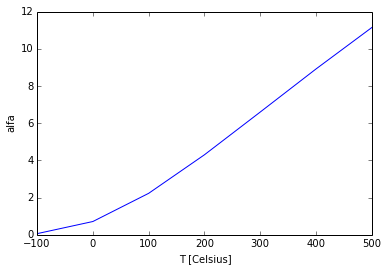

T[C]   alpha
-100   0.06
   0   0.71
 100   2.23
 200   4.30
 300   6.60
 400   8.92
 500   11.15


In [2]:
%matplotlib inline
from numpy import *
import matplotlib.pyplot as plt
aP = 50       # Prefactor of alfa factor
aE = 0.1      # Energy of alfa factor
T = [-100, 0, 100, 200, 300, 400, 500]  # Temperature in Kelvin
a = [aP * exp(-aE / (8.6174e-5 * (x + 273.15))) for x in T]

#plt.plot([1. / x for x in T], a)
plt.plot(T, a)
plt.xlabel("T [Celsius]")
plt.ylabel("alfa")
plt.show()
print ("T[C]   alpha\n============")
for i in range(len(a)):
    print("%4d   %4.2f" % (T[i], a[i])) 



### Interstitial Cascade
#### <font style="text-decoration:underline;">T = -100$^o$C</font>
$$\alpha_I=0.06$$
![Interstitial Random Cascade](files/img/RIS/-100I.png)
#### <font style="text-decoration:underline;">T = 0$^o$C</font>
$$\alpha_I=0.71$$
![Interstitial Random Cascade](files/img/RIS/0I.png)
#### <font style="text-decoration:underline;">T = 100$^o$C</font>
$$\alpha_I=2.23$$
![Interstitial Random Cascade](files/img/RIS/100I.png)
#### <font style="text-decoration:underline;">T = 200$^o$C</font>
$$\alpha_I=4.30$$
![Interstitial Random Cascade](files/img/RIS/200I.png)
#### <font style="text-decoration:underline;">T = 500$^o$C</font>
$$\alpha_I=11.15$$
![Interstitial Random Cascade](files/img/RIS/500I.png)
### Vacancy Cascade
#### <font style="text-decoration:underline;">T = -100$^o$C</font>
$$\alpha_V=0.06$$
![Vacancy Random Cascade](files/img/RIS/-100V.png)
#### <font style="text-decoration:underline;">T = 0$^o$C</font>
$$\alpha_V=0.71$$
![Vacancy Random Cascade](files/img/RIS/0V.png)
#### <font style="text-decoration:underline;">T = 100$^o$C</font>
$$\alpha_V=2.23$$
![Vacancy Random Cascade](files/img/RIS/100V.png)
#### <font style="text-decoration:underline;">T = 500$^o$C</font>
$$\alpha_V=11.15$$
![Vacancy Random Cascade](files/img/RIS/500V.png)
### [Cascade] Interstitials and Vacancies
In these simulations Frenkel-Pairs are introduced at a constant rate. And we assure that at the end of the simulation no point-defects (neither interstitials nor vacancies) remain within the simulation domain. We also check that the total number of atoms within the cells remains constatn if no PD are in the simulation domain.

*<font style="text-decoration:underline;">Diffusivity ratios</font>*
$$\alpha_I(x) = 1 * e^{\frac{-0}{k_BT}}$$
$$\alpha_V(x) = 10 * e^{\frac{-0}{k_BT}}$$

*<font style="text-decoration:underline;">Interactions disabled</font>*
$$ I+V \rightarrow 0 $$
$$ I+I \leftrightarrow I_2 $$
$$ V+V \leftrightarrow V_2 $$

![Electron Cascade](files/img/RIS/IandV.png)

### [Cascade] Interstitials and Vacancies + <111>
As in the previous one, FP's are inserted randomly at a constante rate, but in this case an initial and inmobile <111> of size 50 is introduced at the center of the simulation domain. This defect is going to act as a sink of point defects.

*<font style="text-decoration:underline;">Interactions disabled</font>*
$$ I+V \rightarrow 0 $$
$$ I+I \leftrightarrow I_2 $$
$$ V+V \leftrightarrow V_2 $$

![Electron Cascade](files/img/RIS/IandV_111.png)


